Enter rating w/wo <rating> or random or author <name> for book suggestion
You can also type 'top5' in order to show the top 5 authors on the basis of average ratings
enter to search top5


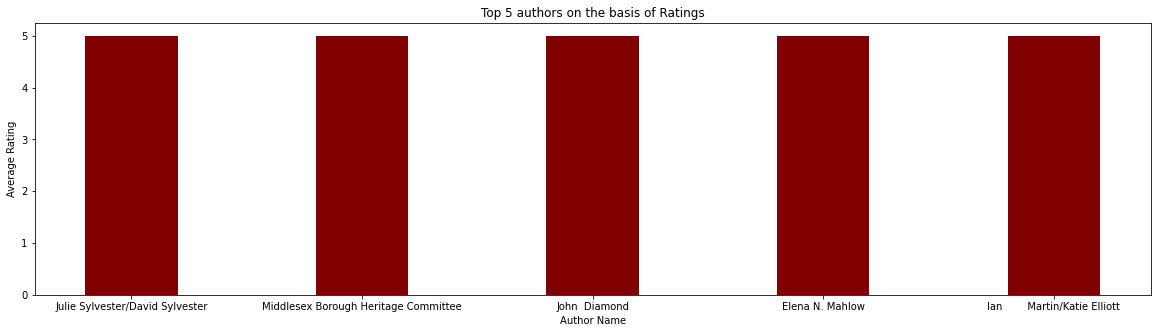

None


In [16]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def recommendation():
    
    print("Enter rating w/wo <rating> or random or author <name> for book suggestion")
    print("You can also type 'top5' in order to show the top 5 authors on the basis of average ratings")
    search= input("enter to search ")
    
    # Read csv file into a pandas dataframe
    df = pd.read_csv("books.csv")
    df = df[df.language_code =='eng']
    df['Title'] = df['title'].str.split('(').str[0]
    
    
    author_list = df['authors'].values.tolist()
    new_list = []
    
    for i in author_list:
        if i not in new_list:
            new_list.append(i)
        else:
            continue
    
    result = []
    
    
    for i in new_list:
        df_temp = df[df['authors'].astype(str) == i]
        rating = df_temp['rating'].values.tolist()
        rating = list(np.float_(rating))
        avg_rating = sum(rating)/len(rating)
        result.append([i, avg_rating])
    result.sort(key=lambda x:x[1], reverse=True)
    
    
    result_authors = []
    result_rating = []
    
    for i in range(5):
        result_authors.append(result[i][0])
        result_rating.append(result[i][1])
    
    
    if search=="random":
        df_new= df.sample(replace=True)[['Title', 'authors',"rating"]]
        print("Title: ", df_new[['Title']].to_string(index=False, header=False))
        print("Author: ", df_new[['authors']].to_string(index=False, header=False))
        print("Rating: ", df_new[['rating']].to_string(index=False, header=False))
        return "Enjoy!"
    elif "rating" in search:
        search=search.split()
        rate=float(search[1])
        df_rate = df[df['rating'].astype(float) >= rate]
        df_new= df_rate.sample(replace=True)[['Title', 'authors',"rating"]]
        print("Title: ", df_new[['Title']].to_string(index=False, header=False))
        print("Author: ", df_new[['authors']].to_string(index=False, header=False))
        print("Rating: ", df_new[['rating']].to_string(index=False, header=False))
        return "Enjoy!"
    elif "author" in search:
        search=search[7:] # input should be like: author <Name>
        author = str(search)
        df_auth = df[df['authors'].astype(str) == author]
        titles = df_auth['title'].values.tolist()
        rating = df_auth['rating'].values.tolist()
        for i in range(len(titles)):
            print(str(i+1) + ": Title: " + titles[i] + " Rating:" + rating[i] + "\n")
        return "Enjoy!"
    elif "top5" in search:
        fig = plt.figure(figsize = (20, 5))
        plt.bar(result_authors, result_rating, color = 'maroon', width=0.4)
        plt.xlabel("Author Name")
        plt.ylabel("Average Rating")
        plt.title("Top 5 authors on the basis of Ratings")
        plt.show()
        
            
print(recommendation())